# **Machine Learning: Supervised Learning**
# **Company Bankruptcy Prediction**
# 
## **Introduction**:
#### The data were taken from the Taiwan Economic Journal 1999-2009. Company bankruptcy  was determined based on the business regulations of the Taiwan Stock Exchange. Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009.
#### source: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/data
#### There are **96 columns** in this dataset. 
#### **1**: the target variable y - Bankrupt?
#### **95**: predictors.
#### **Task**: 
#### predict whether a company will go bankrupt or not.
#### To do this, **I use**:

#### **PCA** - is a data dimensionality reduction technique
#### Dimensionality reduction: Reducing the number of features to speed up machine learning algorithms.
#### Removing redundant data: Reducing the influence of highly correlated features.
#### Noise reduction: Eliminating low variance components that may be noise.
#### **SMOTE** - is a technique for handling unbalanced data. to increase the number of minority examples (minority class) in a dataset by creating synthetic data rather than simply duplicating existing data.
#### **StandardScaler** is a preprocessing tool in scikit-learn used to standardize features by removing the mean and scaling to unit variance. It's particularly useful when the dataset has features with different ranges, which can affect the performance of machine learning algorithms sensitive to feature scaling

#### **Models**:
#### 1. Logistic regression
#### 2. Decision Tree Classifier
#### 3. K Neighbors Classifier
#### 4. Random Forest Classifier
#### 5. Stacking Classifier¶
#### 6. CatBoost (not in class)

## **1. import packages:**

In [1]:
#pip install --upgrade pip
#!pip install -U imbalanced-learn
!pip install lightgbm 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data preparation
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay



## **2. read data:**

In [2]:
# read data
data = pd.read_csv("./data/company_bankruptcy_prediction_data.csv")
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# data shape
shape = data.shape

print(f'\nThe Company Bankruptcy Prediction dataset has {shape[0]} rows and {shape[1]} columns.\n')


The Company Bankruptcy Prediction dataset has 6819 rows and 96 columns.



In [4]:
# data columns info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# data describe
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## **3. Exploratory data analysis (EDA):**

#### **3.1 Columns**

#### **3.2 Data Balanced or Imbalanced**

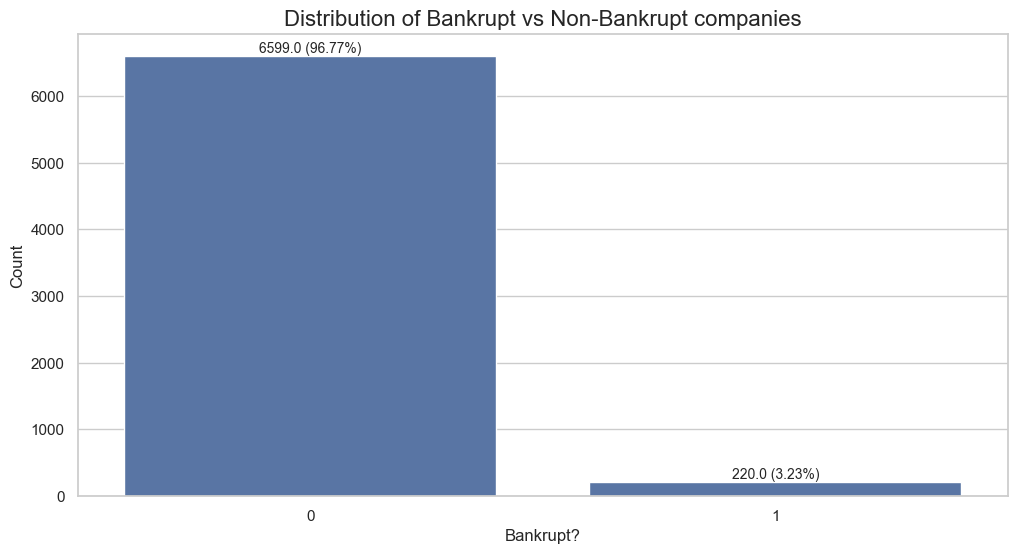

In [6]:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='Bankrupt?', data=data)
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height / total:.2%})', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Bankrupt vs Non-Bankrupt companies', fontsize=16)
plt.xlabel('Bankrupt?', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


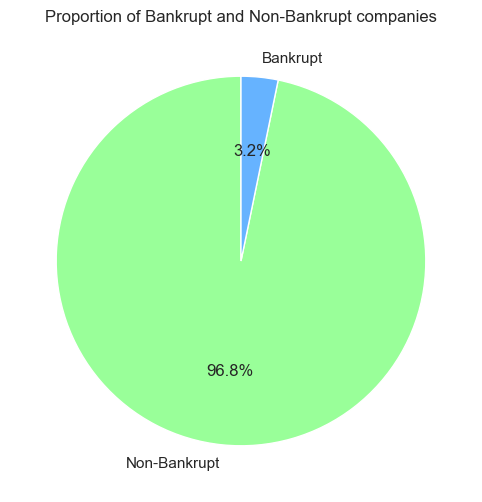

In [7]:
# visualize in a pie chart
labels = ['Non-Bankrupt','Bankrupt']

plt.figure(figsize=(12, 6))
data['Bankrupt?'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90, labels=labels, colors=["#99ff99", "#66b3ff"])
plt.title("Proportion of Bankrupt and Non-Bankrupt companies")
plt.ylabel("")
plt.show()

#### As shown in the plot, the values in the Bankrupt? column are **highly inbalanced**.
#### 

#### **3.3 Check for NULL values**

In [8]:
#Check for NULL values
print(data.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


#### There are no null values in the dataset.

#### **3.4 Check for duplicated values**

In [9]:
#Check for duplicated values
data.duplicated().sum()

0

#### There are no duplicated values in the dataset.

#### **3.5 Check for Bancrupcy value**

In [10]:
data['Bankrupt?'].unique()

array([1, 0], dtype=int64)

#### The unique() output indicates that the Bankrupt? column has two unique values: 1 (bankrupt) and 0 (not bankrupt). This confirms that the dataset represents a binary classification problem.

##
## **4. Prepare data**

In [11]:
X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']

### **Data Cleaning**

#### For effective data cleaning and preparation, the steps I've mentioned—such as dropping constant, correlated, and duplicate features—are essential for ensuring that the data is clean, balanced, and ready for modeling. 

#### **Drop Constant Features**
#### Constant features are those where the value is the same for all rows, which doesn't add any value to the model. Such features don't contribute to variance and therefore don't help in making predictions.
#### 1.They don't provide any useful information for learning patterns in the data.
#### 2.Removing them can reduce dimensionality and improve model efficiency.
#### **Drop Correlated Features**
#### Highly correlated features can lead to multicollinearity, which makes it difficult for models (especially linear models) to determine the individual effect of each feature.
#### 1. Reduces redundancy and helps to improve model stability.
#### 2. Improves the interpretability of the model by reducing the risk of overfitting.
#### **Drop Duplicate Features**
#### Duplicate features are those that are identical in terms of their values. These features do not provide any new information and can be safely removed.
#### 1. Reduces the complexity of the dataset without losing information.
#### 2. Prevents models from overfitting on repeated patterns.

In [12]:
pipeline = Pipeline(steps=[
    # drop constant features
    ('constant',DropConstantFeatures()),
    # drop correlated features
    ('correlated',DropCorrelatedFeatures()),
    # drop duplicate features
    ('duplicate',DropDuplicateFeatures())
])

X = pipeline.fit_transform(X)
X.shape

(6819, 69)

#### **SMOTE**

#### SMOTE (Synthetic Minority Over-sampling Technique) is a technique for addressing class imbalance in datasets. It works by generating synthetic samples for the minority class rather than simply duplicating existing samples. This helps improve model performance by providing a more balanced representation of both classes during training.
#### How SMOTE Works:
1. Select a sample from the minority class.
2. Identify its nearest neighbors (typically k nearest neighbors).
3. Create synthetic samples by interpolating between the selected sample and its neighbors.

In [13]:
smote = SMOTE(random_state=42)
X_smoted, y_smoted = smote.fit_resample(X, y)


#### **SCALE**

#### StandardScaler is a feature scaling technique used to standardize the features of your dataset. It transforms the data such that each feature has a mean of 0 and a standard deviation of 1. This is particularly useful when features have different units or magnitudes, as many machine learning algorithms perform better when the data is scaled uniformly.
Why Use StandardScaler?
1. Improves model performance: Many algorithms (like Logistic Regression, SVM, KNN, etc.) perform better or converge faster when the features are scaled properly.
2. Prevents one feature from dominating: In datasets with features of different scales (e.g., salary in thousands, age in years), some models might give more weight to larger values unless the features are standardized.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.20, random_state=42,stratify=y_smoted)

scaler = StandardScaler()

# Fit and transform the data
scaled_train_X = scaler.fit_transform(X_train)

#### **PCA**

#### Principal Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of features in a dataset while preserving as much information (variance) as possible. PCA helps to project the data into a lower-dimensional space, which can improve the performance of some machine learning models by removing noise, reducing computational cost, and improving model interpretability.
#### Dimensionality Reduction: Reducing the number of features can help speed up computation, especially for algorithms that don’t scale well with high-dimensional data.
#### Improved Model Performance: Reducing dimensions can help remove noise and improve the performance of machine learning models, especially when there are a large number of correlated features.

In [15]:
number_of_components = 25
random_state = 10

pca = PCA(n_components=number_of_components, random_state=random_state)

train_pca = pca.fit_transform(scaled_train_X)

scaled_test_X = scaler.transform(X_test)
test_pca = pca.transform(scaled_test_X)

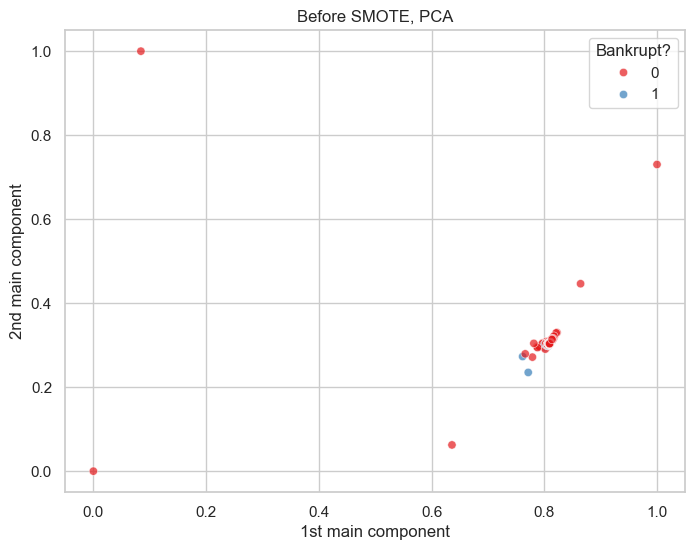

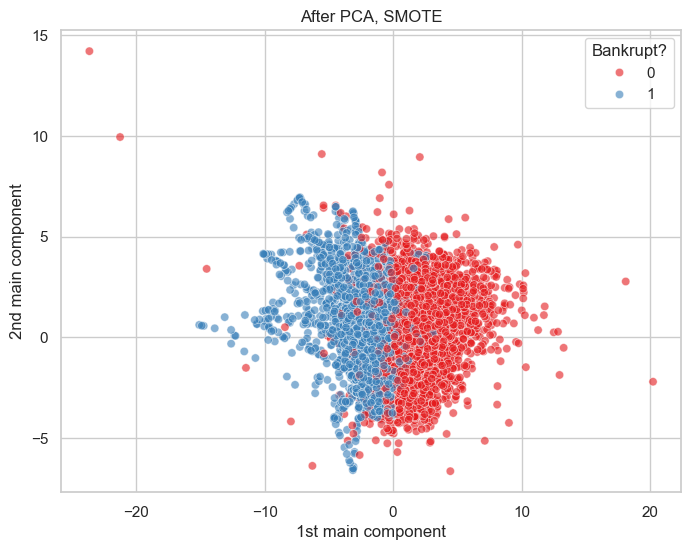

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('Before SMOTE, PCA')
plt.xlabel('1st main component')
plt.ylabel('2nd main component')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=y_train, palette='Set1', alpha=0.6)
plt.title('After PCA, SMOTE')
plt.xlabel('1st main component')
plt.ylabel('2nd main component')
plt.show()

##
## **5. Models**

In [17]:
models = []

### **Logistic regression**

#### Logistic Regression is a supervised learning algorithm used primarily for binary classification, but it can be extended to multi-class classification (via multinomial logistic regression). Despite its name, it is a linear model because it predicts probabilities using a linear combination of input features.

Accuracy: 0.8742424242424243
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1320
           1       0.87      0.88      0.88      1320

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



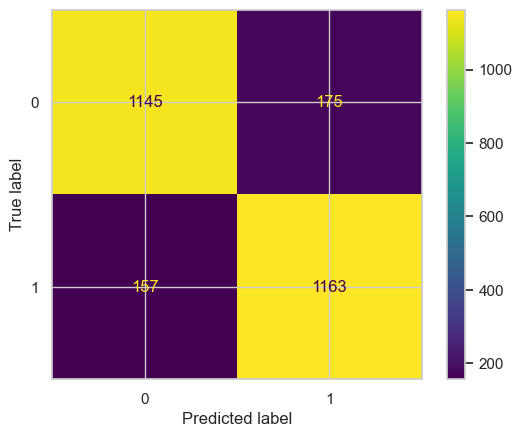

In [18]:
logreg = LogisticRegression(random_state=42)
logreg.fit(train_pca, y_train)

y_pred = logreg.predict(test_pca)

accuracy = accuracy_score(y_test, y_pred)

models.append(("Logistic Regression", accuracy))
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### **Decision Tree Classifier**

#### The Decision Tree Classifier is a versatile supervised learning algorithm that can be used for both classification and regression tasks. It works by splitting the dataset into subsets based on the feature values, creating a tree-like structure of decision nodes and leaves. Each decision node represents a condition on a feature, and each leaf node represents a class label.

Accuracy: 0.9265151515151515
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1320
           1       0.92      0.94      0.93      1320

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640



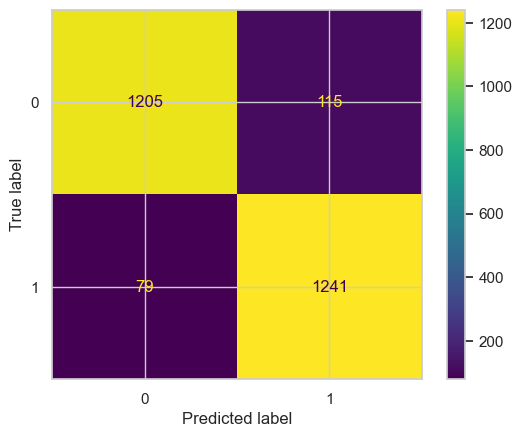

In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_pca, y_train)

y_pred = dt.predict(test_pca)

accuracy = accuracy_score(y_test, y_pred)

models.append(("Decision Tree Classifier", accuracy))
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### **K Neighbors Classifier**

#### The K Neighbors Classifier (KNN) is a simple, non-parametric supervised learning algorithm used for classification and regression. It classifies a new data point based on the majority class among its kk-nearest neighbors in the feature space. KNN is highly intuitive and easy to implement.

Accuracy: 0.9352272727272727
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1320
           1       0.89      1.00      0.94      1320

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.93      2640
weighted avg       0.94      0.94      0.93      2640



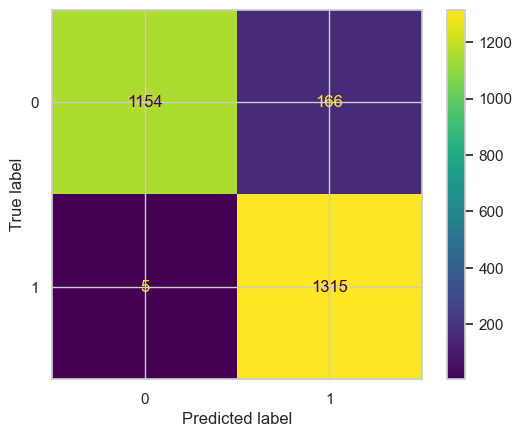

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_pca, y_train)

y_pred = knn.predict(test_pca)

accuracy = accuracy_score(y_test, y_pred)

models.append(("K Neighbors Classifier", accuracy))
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### **Random Forest Classifier**

#### The Random Forest Classifier is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and control overfitting. It works by constructing multiple decision trees during training and outputting the class that is the majority vote among all the trees.

Accuracy: 0.9628787878787879
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1320
           1       0.95      0.98      0.96      1320

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



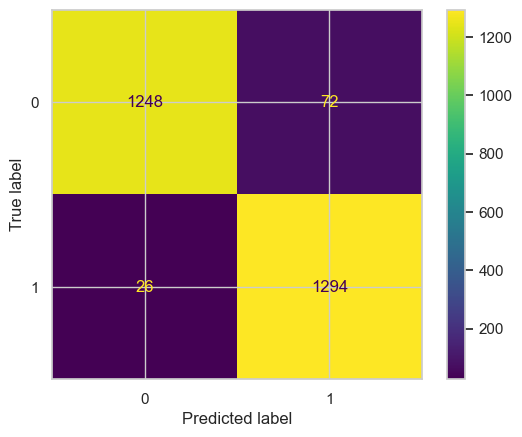

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_pca, y_train)

y_pred = rf.predict(test_pca)

accuracy = accuracy_score(y_test, y_pred)

models.append(("Random Forest Classifier", accuracy))
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### **Stacking Classifier**

#### The Stacking Classifier is an ensemble learning technique that combines multiple base models (or "learners") through a meta-model (also called a "stacker") to improve overall predictive performance. Unlike bagging or boosting, stacking uses a diverse set of models and learns how to optimally combine their predictions.

Accuracy: 0.9784090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1320
           1       0.97      0.98      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



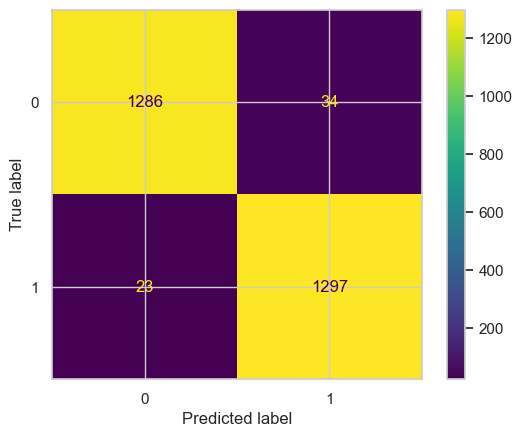

In [22]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(random_state=42))
]

stacking = StackingClassifier(estimators=base_learners, final_estimator=logreg)
stacking.fit(train_pca, y_train)

y_pred = stacking.predict(test_pca)

accuracy = accuracy_score(y_test, y_pred)

models.append(("Stacking Classifier", accuracy))
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


### **CatBoost**

### CatBoost is a gradient boosting library developed by Yandex. It is designed for efficient and accurate machine learning on categorical features, and it performs well on a wide range of problems, including classification, regression, and ranking. One of its key advantages is its ability to handle categorical features without requiring extensive preprocessing, unlike other gradient boosting methods (e.g., XGBoost, LightGBM) which often require one-hot encoding or label encoding.

Accuracy: 0.9712121212121212
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1320
           1       0.95      1.00      0.97      1320

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640



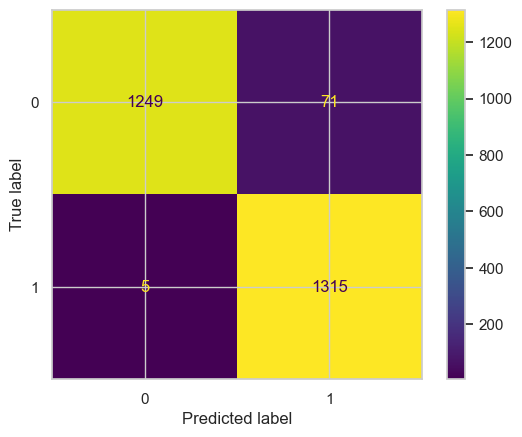

In [23]:
catboost = CatBoostClassifier(silent=True)
catboost.fit(train_pca, y_train)
y_pred = catboost.predict(test_pca)

accuracy = accuracy_score(y_test, y_pred)

models.append(("Catboost", accuracy))
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


### **RESULTS**

In [24]:
results_df = pd.DataFrame(models, columns=['Model', 'Accuracy'])

# Display the table
results_df

,Model,Accuracy
0,Logistic Regression,0.874242
1,Decision Tree Classifier,0.926515
2,K Neighbors Classifier,0.935227
3,Random Forest Classifier,0.962879
4,Stacking Classifier,0.978409
5,Catboost,0.971212


#### I trained and evaluated several machine learning models on the Company Bankruptcy Prediction dataset. The goal was to predict whether a company is likely to go bankrupt based on its financial features.

#### **Summary of Findings**

#### Best Performing Model: The Stacking Classifier achieved the highest accuracy (97.84%). This model combines multiple base classifiers (e.g., logistic regression, decision trees, and k-NN) and uses their collective prediction to improve overall performance.
#### Other Models: The Random Forest Classifier and CatBoost also performed well, with accuracies of 96.29% and 97.12%, respectively. Both of these models are tree-based and tend to handle complex patterns and interactions in the data effectively.
#### Logistic Regression: Among the simpler models, Logistic Regression showed the least performance with an accuracy of 87.42%, which suggests that it struggles with the non-linear relationships present in the data.

#### **Handling Imbalance**: 
#### I applied SMOTE (Synthetic Minority Over-sampling Technique) to handle the class imbalance. This helped to balance the number of bankrupt and non-bankrupt companies in the training set, leading to improved performance in most models.
#### Feature Engineering: I performed several feature engineering steps, including the removal of highly correlated features and the application of PCA (Principal Component Analysis) to reduce dimensionality while retaining most of the variance. This not only helped with model interpretability but also reduced the training time for certain models.

#### **Final**

#### The Company Bankruptcy Prediction problem was addressed effectively with a variety of machine learning models. While the Stacking Classifier performed the best, other models like Random Forest and CatBoost also showed promising results. Future work could explore more advanced tuning and additional features to further improve the model’s performance.